# PDF of surface vorticity and strain in eNATL60 simulation with tides and no tides in ACORES region 

__author__ : Aurélie Albert, Julien Le Sommer (MEOM), Andy Hogg (ANU)

__context__ : paper "On the momentum flux of internal tides" by Shakespeare & Hogg

__date__ : February 2019

__purpose__ : distribution of surface vorticity and strain values in eNATL60 simulation with tides and no tides in the ACORES region 

__detailed description__ : 
Vorticity is defined as :

$$curl = \partial{_x}{v} - \partial{_y}{u} $$

Strain is defined as :

$$strain = \sqrt{ (\partial{_x}{v}+\partial{_y}{u})^2 + (\partial{_x}{u}-\partial{_y}{v})^2 } $$

Both quantities are scale by f.

__practical steps__ :

  * Input data are hourly surface currents from eNATL60-BLB002 simulation (no-tide) and eNTAL60-BLBT02 simulation (tide) 
  
  * Surface vorticity and strain over f are computed with cdfcurl and cdfstrain cdftool : https://github.com/meom-group/CDFTOOLS) for the first two weeks of August 2009
  
  
__external libraries needed to run this script__ : 

 
__licence__ : This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

In [1]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")

import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy.ma as ma

import matplotlib.cm as mplcm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [2]:
## Dataset

dirtide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/1h/ACO/"
dirnotide="/mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLB002-S/1h/ACO/"



In [3]:
filescurltide="eNATL60ACO-BLBT02_1h_*_socurloverf_*.nc"
filesstraintide="eNATL60ACO-BLBT02_1h_*_sostrainoverf_*.nc"

tfilescurltide=dirtide+filescurltide
tfilesstraintide=dirtide+filesstraintide

filescurlnotide="eNATL60ACO-BLB002_1h_*_socurloverf_*.nc"
filesstrainnotide="eNATL60ACO-BLB002_1h_*_sostrainoverf_*.nc"

tfilescurlnotide=dirnotide+filescurlnotide
tfilesstrainnotide=dirnotide+filesstrainnotide


!ls $tfilescurlnotide
!ls $tfilesstraintide

ls: impossible d'accéder à /mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLB002-S/1h/ACO/eNATL60ACO-BLB002_1h_*_socurloverf_*.nc: L'hôte cible est arrêté ou en panne
ls: impossible d'accéder à /mnt/albert/equipes/IGE/meom/MODEL_SET/eNATL60/eNATL60-BLBT02-S/1h/ACO/eNATL60ACO-BLBT02_1h_*_sostrainoverf_*.nc: L'hôte cible est arrêté ou en panne


In [ ]:
fcurltide = xr.open_mfdataset(tfilescurltide)
curltide=fcurltide['socurloverf'][0:10]
navlat= fcurltide['nav_lat'][0]
navlon= fcurltide['nav_lon'][0]

fcurlnotide = xr.open_mfdataset(tfilescurlnotide)
curlnotide=fcurlnotide['socurloverf'][0]

fstraintide = xr.open_mfdataset(tfilesstraintide)
straintide=fstraintide['sostrainoverf'][k]

fstrainnotide = xr.open_mfdataset(tfilesstrainnotide)
strainnotide=fstrainnotide['sostrainoverf'][0]


In [105]:
box=(-31,-28,33,36)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]

ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[1]]
ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[1]]

curltidebox=curltide[:,jmin:jmax+1,imin:imax+1].stack(z=('x', 'y','time_counter'))
curlnotidebox=curlnotide[:,jmin:jmax+1,imin:imax+1].stack(z=('x', 'y','time_counter'))
straintidebox=straintide[:,jmin:jmax+1,imin:imax+1].stack(z=('x', 'y','time_counter'))
strainnotidebox=strainnotide[:,jmin:jmax+1,imin:imax+1].stack(z=('x', 'y','time_counter'))

weights_curltide = np.ones_like(curltidebox)/float(len(curltidebox))
weights_curlnotide = np.ones_like(curlnotidebox)/float(len(curlnotidebox))
weights_straintide = np.ones_like(straintidebox)/float(len(straintidebox))
weights_strainnotide = np.ones_like(strainnotidebox)/float(len(strainnotidebox))



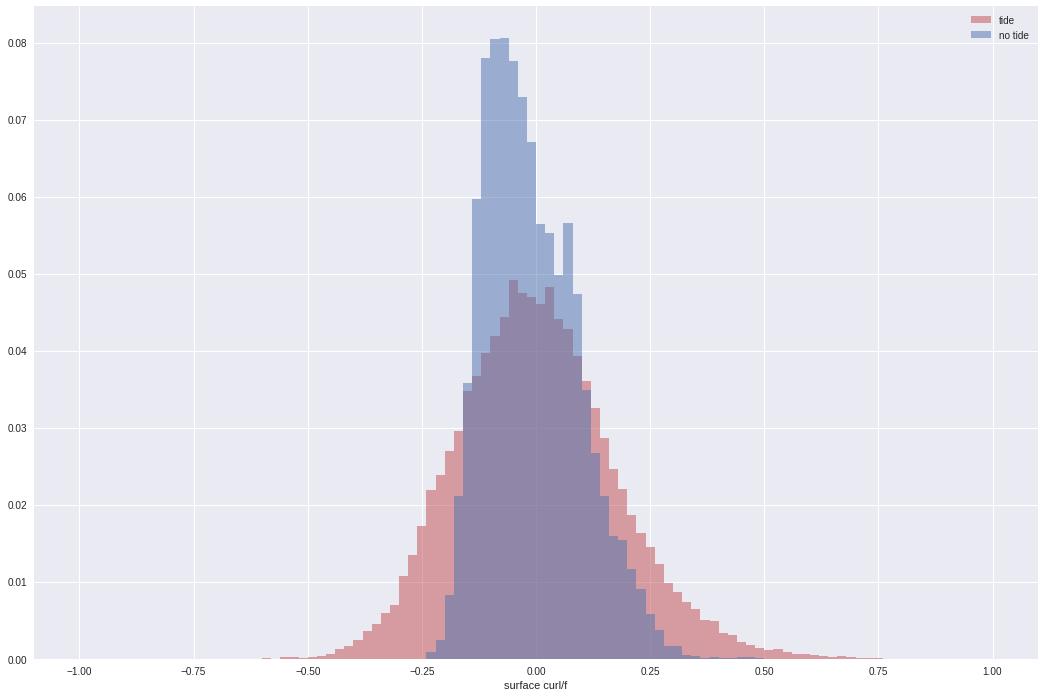

In [102]:
fig = plt.figure(figsize=(18.0, 12.0))
axes1 = fig.add_subplot(1, 1, 1)

axes1.hist(curltidebox,100, alpha = 0.5,range=(-1,1),color='r', weights=weights_curltide,label='tide')
axes1.hist(curlnotidebox,100, alpha = 0.5,range=(-1,1),color='b', weights=weights_curlnotide, label='no tide')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('surface curl/f')
plt.legend()


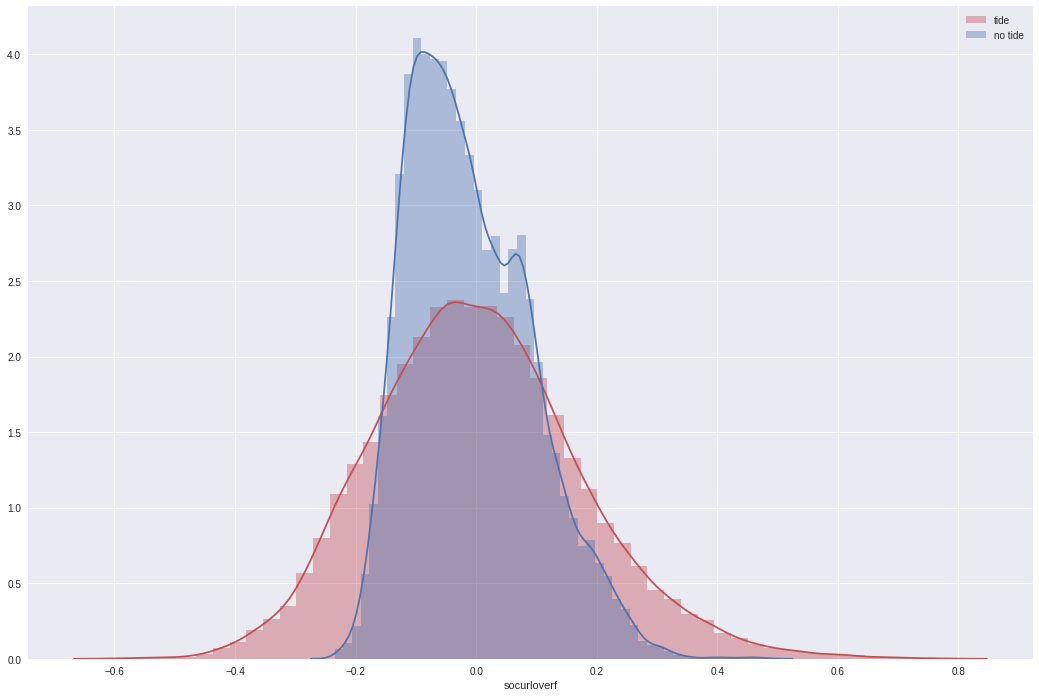

In [103]:
fig = plt.figure(figsize=(18.0, 12.0))
axes1 = fig.add_subplot(1, 1, 1)
sns.distplot(curltidebox, color="r",label='tide',kde=True,hist=True,norm_hist=True)
sns.distplot(curlnotidebox, color="b",label='no tide',kde=True,hist=True,norm_hist=True)
plt.legend()

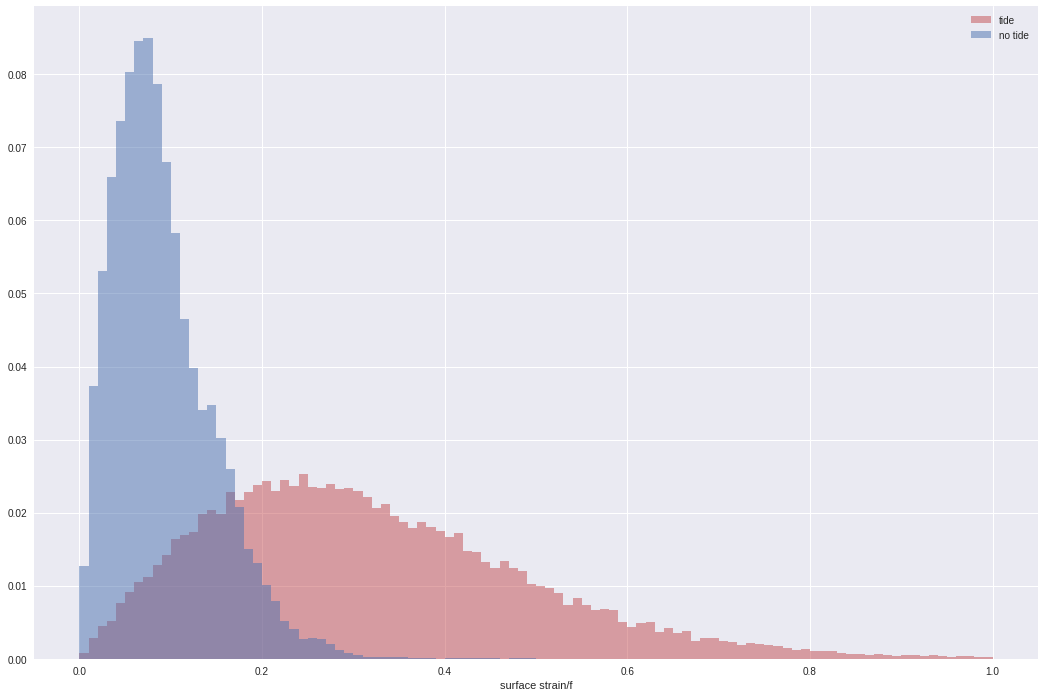

In [108]:
fig = plt.figure(figsize=(18.0, 12.0))
axes1 = fig.add_subplot(1, 1, 1)

axes1.hist(straintidebox,100, alpha = 0.5,range=(0,1),color='r', weights=weights_straintide,label='tide')
axes1.hist(strainnotidebox,100, alpha = 0.5,range=(0,1),color='b', weights=weights_strainnotide, label='no tide')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('surface strain/f')
plt.legend()


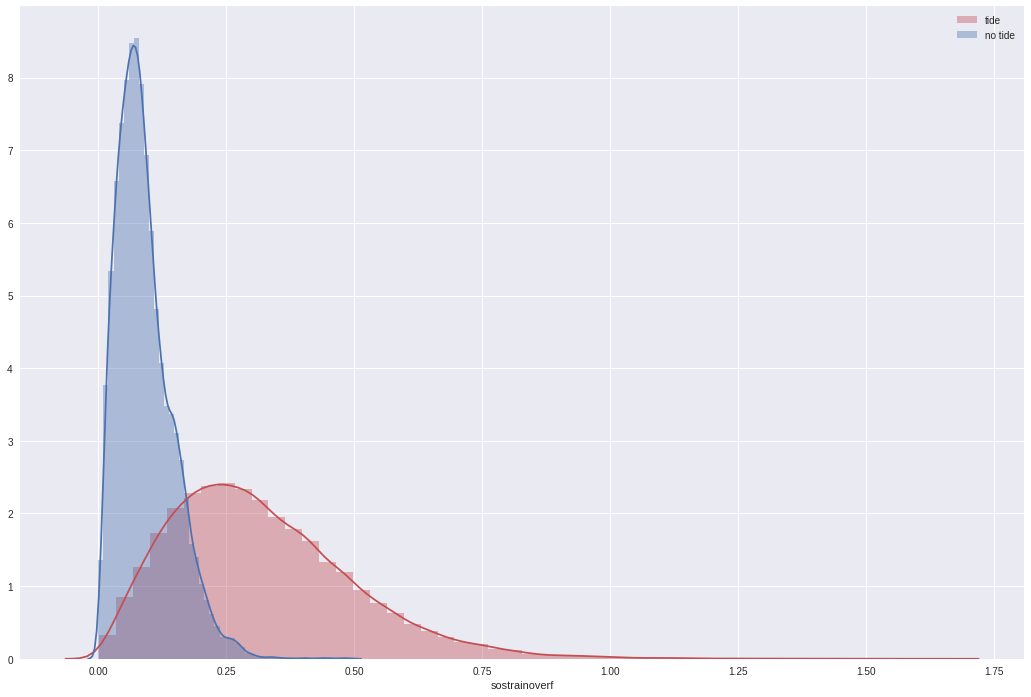

In [109]:
fig = plt.figure(figsize=(18.0, 12.0))
axes1 = fig.add_subplot(1, 1, 1)
sns.distplot(straintidebox, color="r",label='tide',kde=True,hist=True,norm_hist=True)
sns.distplot(strainnotidebox, color="b",label='no tide',kde=True,hist=True,norm_hist=True)
plt.legend()